In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for k in range(10):
    
    tf.reset_default_graph()
    
    print('---------' + str(k) + '------------')
    
    MAX_EPISODE = 100
    MAX_EPISODE_LEN = 10000

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.5
    epsilon = 1.0

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'epsilon':epsilon, 'sigma2':SIGMA2}
    
    IS_TRAIN = False
#     rate = 3.0
    res_path = 't_M_05_nB_dqn/'
    model_path = 'model_M_05_nB_dqn/my_train_model_'+str(k)+'-2000'
    meta_path = model_path+'.meta'
    init_path = ''
    
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':1.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'2', 'model':'AR', 'num_r':NUM_R, 'rate':2.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'3', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5}]

    print(user_config)
    # 0. initialize the session object
    sess = tf.Session() 

    # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
    # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        info['model_path'] = model_path
        info['meta_path'] = info['model_path']+'.meta'
        info['init_path'] = init_path
        user_list.append(MecTermDQN_LD(sess, info, train_config))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

#     sess.run(tf.global_variables_initializer())
    
#     tflearn.config.is_training(is_training=IS_TRAIN, session=sess)

#     env.init_target_network()

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = res_path+'test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    
    sess.close()

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
---------0------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}, {'id': '3', 'model': 'AR', 'num_r': 4, 'rate': 3.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}]
INFO:tensorflow:Restoring parameters from model_M_05_nB_dqn/my_train_model_0-2000
Initialization OK!----> user 1
INFO:tensorflow:Restoring parameters from model_M_05_nB_dqn/my_train_model_0-2000
Initialization OK!----> user 2
INFO:tensorflow:Restoring parameters from model_M_05_nB_dqn/my_train_model_0-2000
Initialization OK!----> user 3
0:r:[  -4.77405666   -9.2661645  -303.22636858],p:[0.7360189

19:r:[  -4.7341866    -9.25226364 -284.5339062 ],p:[0.71900677 1.22738126 1.48920094],op:[8.85932331e-02 3.42868743e-01 2.49058849e-04],tr:[0.87358722 0.86247842 0.96621048],pr:[0.43608376 1.62391862 1.96316339],rev:[0.9882 2.0033 3.0235],dbuf:[  1.39237321   2.80202728 554.1733124 ],ch:[4.19815599 3.90103115 4.08127294],ibuf:[37.0, 43.0, 12.5],rbuf:[  1.44113413   1.         960.79361321]
20:r:[  -4.80443537   -9.1751901  -221.63766055],p:[0.73387367 1.20526834 1.49936208],op:[8.76263330e-02 3.59581665e-01 8.79169442e-05],tr:[0.84155275 0.90539101 0.9380726 ],pr:[0.45275962 1.60407666 1.98537748],rev:[0.9832 1.9911 2.9879],dbuf:[  1.39387073   2.70188019 428.2808211 ],ch:[4.02435888 4.18936283 3.97253773],ibuf:[15.0, 28.5, 35.5],rbuf:[  1.           8.44362998 682.34476808]
21:r:[  -4.79264238   -9.30960256 -112.41308997],p:[0.73651247 1.20957158 1.5017    ],op:[0.08128753 0.37037842 0.        ],tr:[0.88331201 0.88106124 0.93442041],pr:[0.42971502 1.63826045 2.00682738],rev:[0.9982 2.

41:r:[  -4.70399808   -9.21884494 -269.46023751],p:[0.71689099 1.19819819 1.4986    ],op:[0.08215901 0.37700181 0.        ],tr:[0.84634933 0.89418585 0.91505609],pr:[0.44548595 1.63541402 1.99358131],rev:[0.9874 1.9992 3.0152],dbuf:[  1.41749615   2.68568987 523.93447503],ch:[3.99341609 4.08521114 3.9077648 ],ibuf:[30.5, 44.0, 31.5],rbuf:[   2.            7.59884552 1097.12600528]
42:r:[  -4.847454     -9.22690612 -377.51333812],p:[0.73869141 1.21081343 1.50045   ],op:[0.09010859 0.36283657 0.        ],tr:[0.83944756 0.86704311 0.90179421],pr:[0.46747861 1.62881161 2.00048276],rev:[1.0023 1.9895 3.0411],dbuf:[  1.406908     2.71731223 740.02217623],ch:[3.92663683 4.0353453  3.89332889],ibuf:[18.5, 29.0, 45.5],rbuf:[6.57297319e-01 7.10571515e-01 1.43373033e+03]
43:r:[  -4.85661343   -9.21699389 -243.82235613],p:[0.73614955 1.21304712 1.5009    ],op:[0.09450045 0.35345288 0.        ],tr:[0.84883061 0.86965415 0.91467143],pr:[0.46388403 1.61509922 1.98964904],rev:[0.991  1.9883 3.0041],db

63:r:[  -4.94894407   -9.18939284 -348.34794735],p:[0.74407584 1.20947298 1.5026    ],op:[0.09722416 0.35817702 0.        ],tr:[0.8301382  0.8730724  0.89062872],pr:[0.49403626 1.62042588 2.0057282 ],rev:[1.0075 1.9983 3.0155],dbuf:[  1.48488815   2.70228567 681.66989471],ch:[3.92708899 4.09992915 4.05884936],ibuf:[47.5, 12.0, 32.5],rbuf:[1.00000000e+00 3.26806583e+00 1.22393081e+03]
64:r:[  -4.83779932   -9.22034701 -247.4587113 ],p:[0.74310654 1.20644917 1.50065   ],op:[0.07429346 0.36385083 0.        ],tr:[0.8599084  0.87192394 0.93740039],pr:[0.44679024 1.63046787 1.99751464],rev:[1.0188 1.9981 3.0122],dbuf:[  1.50159864   2.73769402 479.91092259],ch:[3.97096495 3.99861158 4.07148133],ibuf:[37.0, 36.5, 28.5],rbuf:[  0.           0.         801.34964742]
65:r:[  -4.90542798   -9.22896831 -224.07013829],p:[0.74824354 1.21476166 1.5032    ],op:[0.08585646 0.35748834 0.        ],tr:[0.84748923 0.87910332 0.93027835],pr:[0.46296753 1.62942585 2.00614572],rev:[1.0052 2.0061 3.002 ],dbuf:

85:r:[  -4.84697272   -9.27424739 -333.34224674],p:[0.73387832 1.22253901 1.5008    ],op:[0.09307168 0.35311099 0.        ],tr:[0.82820696 0.83867951 0.91802657],pr:[0.47486296 1.65191136 1.99594843],rev:[0.998  2.0085 3.023 ],dbuf:[  1.42444544   2.79199479 651.67649349],ch:[3.97647049 3.81249273 4.0218055 ],ibuf:[11.5, 20.5, 18.0],rbuf:[1.14325084e+00 1.00000000e+00 1.10824992e+03]
86:r:[  -4.82404685   -9.17173076 -208.88325434],p:[0.73705944 1.20258725 1.5009    ],op:[0.08459056 0.36136275 0.        ],tr:[0.86135928 0.8461421  0.9362721 ],pr:[0.44603285 1.639168   1.99243938],rev:[0.9993 1.9853 3.0045],dbuf:[  1.4315937    2.70396152 402.75750868],ch:[4.02834513 3.86319238 4.02142065],ibuf:[29.5, 11.5, 13.5],rbuf:[6.10945390e-02 3.58229236e-01 7.71385239e+02]
87:r:[  -4.91281762   -9.14179273 -235.65703511],p:[0.74585118 1.21455843 1.50215   ],op:[0.09199882 0.34739157 0.        ],tr:[0.82500372 0.87294571 0.91999031],pr:[0.47865678 1.6046003  2.00013573],rev:[1.0067 1.9877 2.9993]

5:r:[ -3.38446393  -7.93816322 -41.8120306 ],p:[0.28637595 1.19092796 1.66555394],op:[0.25247405 0.06107204 0.00144606],tr:[0.07888924 0.94182695 1.24594578],pr:[1.54068956 1.20935889 1.74262742],rev:[0.9836 2.0142 2.9938],dbuf:[ 1.38042786  3.35632644 66.9540612 ],ch:[3.98670608 4.00075369 3.87163073],ibuf:[15.0, 14.5, 1.5],rbuf:[ 1.          4.99262911 91.44803741]
6:r:[ -3.41391657  -7.86988893 -29.88802904],p:[0.29474666 1.17321565 1.59801743],op:[0.24495334 0.07013435 0.00288257],tr:[0.07211668 0.96116834 1.19243746],pr:[1.54861022 1.20547689 1.77587063],rev:[1.0105 2.0169 2.9672],dbuf:[ 1.43083315  3.30627787 43.76705808],ch:[4.01243085 4.04033825 4.02717972],ibuf:[1.5, 14.0, 9.5],rbuf:[ 2.          5.23188099 72.9003589 ]
7:r:[ -3.40023936  -7.80907579 -38.93525108],p:[0.29065194 1.16711054 1.62742738],op:[0.25004806 0.06273946 0.00132262],tr:[0.0783907  0.94664919 1.26596449],pr:[1.5425185  1.19460186 1.71909172],rev:[0.9936 2.0005 2.9865],dbuf:[ 1.39347872  3.31965157 61.58300

28:r:[ -3.40796939  -7.75252803 -42.75169774],p:[0.29199313 1.15803152 1.64462539],op:[0.24665687 0.06216848 0.00027461],tr:[0.07355007 0.93042015 1.27354082],pr:[1.54596952 1.18043716 1.71497097],rev:[1.0021 1.9656 2.994 ],dbuf:[ 1.42943878  3.30305607 69.05439549],ch:[4.08820452 4.00036908 4.01477367],ibuf:[38.5, 33.0, 19.5],rbuf:[ 0.          0.41259895 80.03597869]
29:r:[ -3.43352712  -7.8748084  -44.38702121],p:[0.29612616 1.16913181 1.64574247],op:[2.44823839e-01 6.23181914e-02 1.07527187e-04],tr:[0.084214   0.96866194 1.28651947],pr:[1.53812338 1.17835996 1.71125421],rev:[1.0014 2.0077 3.0013],dbuf:[ 1.45755423  3.43511681 72.31554243],ch:[4.1002672  4.16377547 4.0035598 ],ibuf:[36.0, 48.0, 44.5],rbuf:[ 1.          6.47526368 82.89357552]
30:r:[ -3.44183158  -7.80692067 -42.3579079 ],p:[0.29530594 1.17048062 1.65498407],op:[0.24739406 0.06231938 0.00111593],tr:[0.07373885 0.94754865 1.31018232],pr:[1.54567644 1.18249209 1.69825508],rev:[1.0014 1.9899 3.0089],dbuf:[ 1.45666315  3

50:r:[ -3.41358232  -7.92560188 -42.19980623],p:[0.28955331 1.18540244 1.61537299],op:[0.25394669 0.06374756 0.00052701],tr:[0.0719195  0.95168673 1.28917691],pr:[1.54962912 1.20166654 1.69416847],rev:[0.9915 2.0089 2.9879],dbuf:[ 1.39216463  3.35970375 68.24061246],ch:[3.80974577 3.96402744 4.09852078],ibuf:[1.5, 29.0, 12.0],rbuf:[ 0.41259895  5.41259895 72.45321627]
51:r:[ -3.4574864   -7.93157747 -44.56743666],p:[0.29691984 1.18326893 1.63354551],op:[0.24713016 0.06468107 0.00030449],tr:[0.09109969 0.97259581 1.33134786],pr:[1.53357604 1.18422511 1.67207938],rev:[0.9997 2.0106 3.007 ],dbuf:[ 1.4744728   3.38365493 72.79637332],ch:[4.05965394 4.09303009 4.20004894],ibuf:[48.5, 37.0, 25.0],rbuf:[ 1.080349    3.80095179 67.33790947]
52:r:[ -3.45060237  -7.76103555 -45.64643549],p:[0.29638127 1.15761443 1.65896856],op:[0.24371873 0.05923557 0.00043144],tr:[0.08247869 0.97401571 1.28886097],pr:[1.54015749 1.1471489  1.71149543],rev:[1.0092 1.9866 3.0033],dbuf:[ 1.50020474  3.35357111 74.

72:r:[ -3.40014269  -7.85617444 -43.77586362],p:[0.29293888 1.17704814 1.61944497],op:[2.44411119e-01 6.43518581e-02 5.03383546e-06],tr:[0.08156885 0.96089553 1.27861838],pr:[1.53849841 1.19277898 1.68324882],rev:[1.0045 1.9937 2.9653],dbuf:[ 1.42678537  3.29834888 71.35722723],ch:[4.08011932 3.94974465 3.96341525],ibuf:[11.5, 26.0, 37.5],rbuf:[ 1.          1.55629999 71.88317625]
73:r:[ -3.44900602  -7.69964008 -40.86901099],p:[0.30120731 1.15045407 1.64281617],op:[0.24184269 0.06419593 0.00103383],tr:[0.08226874 0.95151482 1.26026735],pr:[1.54179007 1.17678052 1.72715867],rev:[1.0175 1.9786 2.9906],dbuf:[ 1.46751204  3.25278016 65.29952197],ch:[3.95095924 3.92419545 3.92132979],ibuf:[22.0, 11.5, 15.0],rbuf:[ 1.8251979   0.28622535 72.28136301]
74:r:[ -3.41317217  -7.73131563 -43.97687991],p:[0.28880464 1.15581344 1.62443039],op:[0.25079536 0.06023656 0.00071961],tr:[0.07116821 0.91682989 1.28654618],pr:[1.54847815 1.18858886 1.7028538 ],rev:[0.9982 1.9638 2.993 ],dbuf:[ 1.43034433  3

94:r:[ -3.3776389   -7.94003981 -39.50919476],p:[0.2820662  1.1902997  1.61645353],op:[0.2556338  0.0610503  0.00129647],tr:[0.06557839 0.93884509 1.25586195],pr:[1.55161397 1.21964075 1.71250574],rev:[0.9832 2.0198 2.9742],dbuf:[ 1.3782778   3.36657962 62.84088952],ch:[3.91275392 3.92813688 4.01768975],ibuf:[14.0, 24.0, 2.5],rbuf:[ 1.65039579  5.63254599 89.01411535]
95:r:[ -3.43253137  -7.81118451 -45.69820519],p:[0.29701059 1.16951138 1.68481937],op:[0.24438941 0.06198862 0.00028063],tr:[0.08628779 0.93665714 1.3039195 ],pr:[1.53746975 1.19107876 1.71641221],rev:[1.0119 1.9801 3.0263],dbuf:[ 1.45106274  3.30736901 74.54541039],ch:[4.04991426 4.01335772 3.94401677],ibuf:[6.5, 33.5, 8.5],rbuf:[ 2.23779684  0.97471124 75.47754886]
96:r:[ -3.36944266  -7.90658108 -46.79751723],p:[0.2840213 1.1767225 1.7022   ],op:[0.2497287 0.0650775 0.       ],tr:[0.08633934 0.95002316 1.27566821],pr:[1.53320704 1.19883105 1.74056572],rev:[0.983  2.0093 3.0212],dbuf:[ 1.40138533  3.39516217 76.57303446

14:r:[ -3.67626975  -7.80086684 -15.24827035],p:[0.46680158 1.0669002  1.72885516],op:[0.03144842 0.1770998  0.01674484],tr:[0.54497497 0.67048054 1.12359384],pr:[0.6039139  1.63949067 1.90418653],rev:[1.0071 1.9791 3.003 ],dbuf:[ 2.3700395   3.16173369 13.04054069],ch:[3.90232502 4.0343651  4.04683487],ibuf:[48.5, 29.0, 14.0],rbuf:[ 7.          4.         11.70594494]
15:r:[ -3.65260047  -7.86959386 -15.08633169],p:[0.46053201 1.06942077 1.73403259],op:[0.02981799 0.19097923 0.01496741],tr:[0.58086381 0.68112763 1.16057187],pr:[0.5717375  1.64587468 1.89624729],rev:[1.0116 1.9834 3.0349],dbuf:[ 2.40170095  3.13518773 12.68266339],ch:[4.16627477 4.00437923 4.14519116],ibuf:[7.5, 45.5, 3.5],rbuf:[ 3.38139784  0.21514952 17.08112864]
16:r:[ -3.67211789  -7.81561241 -15.28714802],p:[0.46461443 1.07175924 1.75452963],op:[0.03228557 0.17899076 0.01467037],tr:[0.57811134 0.67248158 1.12511679],pr:[0.56458663 1.64185693 1.90972047],rev:[0.9932 1.9888 3.0117],dbuf:[ 2.37523579  3.12372481 12.8

37:r:[ -3.60650372  -7.86857933 -15.46441797],p:[0.45703532 1.07122334 1.74873114],op:[0.03276468 0.19282666 0.01376886],tr:[0.55556309 0.70320853 1.15047496],pr:[0.57439831 1.63391117 1.91164431],rev:[0.9843 1.981  3.0414],dbuf:[ 2.31500743  3.09665867 13.30383594],ch:[3.98165519 3.99155617 3.96069235],ibuf:[8.0, 33.0, 8.0],rbuf:[0.35536621 4.6944947  5.8711745 ]
38:r:[ -3.68890656  -7.87791625 -15.04475159],p:[0.46709352 1.08383523 1.71714343],op:[0.02990648 0.18056477 0.01565657],tr:[0.56145716 0.66230135 1.12422252],pr:[0.59423246 1.65320133 1.90311115],rev:[1.008  1.996  3.0029],dbuf:[ 2.40781312  3.11183249 12.76150317],ch:[4.00162273 3.94112319 4.11139054],ibuf:[12.0, 6.0, 12.0],rbuf:[ 3.56078888  5.         15.89244668]
39:r:[ -3.69874288  -7.93821834 -15.47538982],p:[0.46500054 1.09008372 1.74987891],op:[0.03274946 0.18166628 0.01527109],tr:[0.55391025 0.67020429 1.10993478],pr:[0.59096137 1.66518715 1.91364871],rev:[0.9993 2.0066 2.999 ],dbuf:[ 2.41998576  3.15893668 13.29927

60:r:[ -3.62229773  -7.78816518 -14.97727809],p:[0.45757677 1.06748983 1.72291984],op:[0.03137323 0.18191017 0.01858016],tr:[0.55574234 0.69533773 1.13061748],pr:[0.5778454  1.62736659 1.89507941],rev:[0.9972 1.9877 2.9943],dbuf:[ 2.35509545  3.08233035 12.53955618],ch:[3.98376091 4.03409809 3.98718709],ibuf:[1.5, 26.5, 49.0],rbuf:[ 5.8251979   7.38222086 10.28900651]
61:r:[ -3.68707684  -7.84290625 -14.93382033],p:[0.46756193 1.07748942 1.71889004],op:[0.02738807 0.17721058 0.01520996],tr:[0.5567258  0.65903888 1.12910114],pr:[0.57778124 1.64217384 1.90353688],rev:[1.0032 1.9763 3.0074],dbuf:[ 2.42465368  3.13881251 12.52664067],ch:[4.02252958 3.88930822 4.10722016],ibuf:[30.0, 21.5, 30.0],rbuf:[7.         3.23921111 6.0544636 ]
62:r:[ -3.66371351  -7.85402422 -15.70106126],p:[0.4625128  1.07687391 1.77926947],op:[0.0317872  0.18232609 0.01298053],tr:[0.53126229 0.66928994 1.11994536],pr:[0.60767053 1.65142024 1.91660596],rev:[1.0059 1.9947 3.0186],dbuf:[ 2.38442702  3.11604844 13.479

83:r:[ -3.72789015  -7.93173526 -14.92711562],p:[0.46984809 1.07902389 1.73800668],op:[0.03005191 0.18717611 0.01859332],tr:[0.57155032 0.68392375 1.11635657],pr:[0.58610808 1.65647699 1.89976134],rev:[1.0175 1.9963 2.9917],dbuf:[ 2.4567803   3.20147051 12.28823125],ch:[4.04739737 3.98914156 3.89204941],ibuf:[44.0, 30.0, 23.5],rbuf:[ 3.01085556  2.65901596 32.22421172]
84:r:[ -3.63289125  -7.91151061 -15.31895523],p:[0.45872457 1.07436985 1.74858074],op:[0.03587543 0.19628015 0.01541926],tr:[0.54600097 0.67252903 1.10299319],pr:[0.59874306 1.66956858 1.90768223],rev:[0.9868 1.9945 2.9858],dbuf:[ 2.31978249  3.11652123 12.99791047],ch:[3.91774384 3.92003614 3.85828788],ibuf:[21.0, 47.5, 24.0],rbuf:[ 4.27657725  2.         22.24907161]
85:r:[ -3.64109028  -7.95270119 -14.59933183],p:[0.4601122  1.09623754 1.68819885],op:[0.0342878  0.17436246 0.01740115],tr:[0.55203033 0.67613506 1.10369779],pr:[0.59281916 1.65755593 1.8958547 ],rev:[0.9908 2.0183 2.9707],dbuf:[ 2.33818055  3.19940239 12

3:r:[ -4.06011604  -8.47577606 -16.79222194],p:[0.46908041 1.04012514 1.80130945],op:[0.18726959 0.07737486 0.00199055],tr:[0.5079057  0.11755598 1.251338  ],pr:[1.15115389 2.00950181 1.74855632],rev:[1.0011 2.0139 2.9967],dbuf:[ 1.55673208  5.77655212 15.55144388],ch:[4.00188695 4.07851145 4.13692394],ibuf:[21.5, 29.0, 7.0],rbuf:[ 2.63494901  1.         12.7365639 ]
4:r:[ -4.08985255  -8.3482332  -17.47681732],p:[0.48185074 1.02215027 1.82554242],op:[0.17814926 0.09099973 0.00215758],tr:[0.54128203 0.09871654 1.20305492],pr:[1.13198108 2.0159252  1.81511601],rev:[1.0256 1.9848 3.013 ],dbuf:[ 1.5797051   5.5649664  16.67663464],ch:[4.12103928 4.05517259 3.91879164],ibuf:[8.0, 39.0, 26.5],rbuf:[ 0.          4.19574639 14.41429583]
5:r:[ -4.02679242  -8.25300373 -18.60817391],p:[0.46529884 1.0162942  1.83563723],op:[0.18655116 0.0924058  0.00176277],tr:[0.51286012 0.10029827 1.22546337],pr:[1.14877725 2.00945322 1.80071506],rev:[1.0103 1.9827 3.0195],dbuf:[ 1.53508484  5.41900747 18.8423

26:r:[ -4.00616324  -8.52336084 -16.58013169],p:[0.46057116 1.04888077 1.76514303],op:[0.18957884 0.08626923 0.00280697],tr:[0.51218092 0.11512611 1.25879539],pr:[1.14735168 2.02409638 1.72552916],rev:[0.9908 2.0191 2.9794],dbuf:[ 1.51082647  5.69522169 15.48076337],ch:[4.04228914 3.87693196 4.1146633 ],ibuf:[30.5, 11.0, 13.5],rbuf:[ 2.41259895  7.57404951 19.51911585]
27:r:[ -3.96502831  -8.45069521 -18.12141339],p:[0.45085177 1.03877157 1.81576358],op:[0.19369823 0.08487843 0.00318642],tr:[0.47976412 0.10631657 1.23673009],pr:[1.16930083 2.017019   1.78501556],rev:[0.9918 2.0001 3.0115],dbuf:[ 1.48455663  5.66489043 18.05332677],ch:[3.9188908  3.97032013 3.99457253],ibuf:[5.0, 38.5, 47.5],rbuf:[1.         3.         8.94716974]
28:r:[ -4.08372247  -8.52225033 -17.51797519],p:[0.47605435 1.04265312 1.79544529],op:[0.18609565 0.08544688 0.00425471],tr:[0.54830826 0.11160592 1.21845273],pr:[1.12807855 2.01842455 1.77195602],rev:[1.0043 2.0074 2.9812],dbuf:[ 1.54594495  5.76350066 17.038

49:r:[ -3.99092637  -8.42649067 -16.57851969],p:[0.45555346 1.03464379 1.79571788],op:[0.19089654 0.08640621 0.00208212],tr:[0.47316428 0.10569427 1.22429859],pr:[1.16991306 2.01672052 1.75776203],rev:[0.9931 2.0004 2.9767],dbuf:[ 1.51735274  5.64248135 15.17903938],ch:[3.93318123 3.97897121 4.05067815],ibuf:[0.5, 9.0, 16.5],rbuf:[1.82519790e+00 6.66133815e-15 4.50528308e+00]
50:r:[ -4.01270912  -8.52624584 -16.55933791],p:[0.46933876 1.04399671 1.79104788],op:[0.18506124 0.08420329 0.00345212],tr:[0.54399801 0.11438293 1.17754527],pr:[1.12998822 2.01795945 1.79140917],rev:[0.9998 2.0113 2.9593],dbuf:[ 1.48141824  5.77049167 15.17367582],ch:[4.17608927 3.8329435  3.9584526 ],ibuf:[1.5, 25.5, 22.5],rbuf:[1.99925392 4.         7.74594918]
51:r:[ -3.98037757  -8.48104396 -17.56574208],p:[0.45050682 1.04344641 1.79754193],op:[0.19174318 0.08550359 0.00395807],tr:[0.45900067 0.11189971 1.24769805],pr:[1.18302142 2.01846301 1.75946683],rev:[0.9989 2.0101 3.005 ],dbuf:[ 1.53825514  5.67258793

72:r:[ -3.98763987  -8.34555962 -18.57491572],p:[0.45472955 1.02284981 1.81642598],op:[0.18922045 0.09240019 0.00412402],tr:[0.46291232 0.10697373 1.17887173],pr:[1.18358677 2.01181325 1.81936005],rev:[1.0126 1.984  2.9896],dbuf:[ 1.53577974  5.53861925 18.94433144],ch:[3.87220052 4.10928508 3.92044226],ibuf:[17.5, 40.0, 20.5],rbuf:[1.87645457 1.         5.73919952]
73:r:[ -3.98940268  -8.56421783 -17.05315287],p:[0.45808042 1.050076   1.78990849],op:[0.19211958 0.073774   0.00319151],tr:[0.49711544 0.11086884 1.24322767],pr:[1.15823935 2.01660775 1.74631778],rev:[0.9938 2.0214 2.9836],dbuf:[ 1.47680535  5.88993567 16.17530574],ch:[3.91788653 4.06403611 4.07812072],ibuf:[6.5, 38.0, 16.5],rbuf:[ 4.          6.12976369 11.9034975 ]
74:r:[ -4.00645419  -8.57032442 -18.34745009],p:[0.46223059 1.04756732 1.81223389],op:[0.18681941 0.07778268 0.00376611],tr:[0.49425624 0.11807415 1.19083605],pr:[1.15628663 2.01432722 1.80240734],rev:[1.0045 2.0155 2.9855],dbuf:[ 1.52240838  5.88714883 18.534

95:r:[ -4.00224068  -8.23972865 -16.36797062],p:[0.46175458 1.0136717  1.77650204],op:[0.19289542 0.0928283  0.00289796],tr:[0.53453364 0.11165846 1.24543148],pr:[1.14791511 2.00567824 1.75515003],rev:[0.9819 1.9847 2.9919],dbuf:[ 1.45798136  5.41445731 14.94194123],ch:[4.1244468  4.14262503 3.9721781 ],ibuf:[11.5, 3.0, 45.5],rbuf:[ 0.          4.         14.58160363]
96:r:[ -4.04544338  -8.45773213 -17.91028332],p:[0.46602098 1.04194023 1.83677069],op:[0.18867902 0.08860977 0.00307931],tr:[0.50596064 0.11713348 1.25864708],pr:[1.14935194 2.01889387 1.77824499],rev:[0.9933 2.0084 3.0287],dbuf:[ 1.54388675  5.60996427 17.42206665],ch:[3.9748348  4.07362256 4.06664593],ibuf:[31.5, 14.0, 23.5],rbuf:[ 2.          8.61259494 10.30517454]
97:r:[ -3.97798798  -8.50537461 -17.86887878],p:[0.45906029 1.04157392 1.82665831],op:[0.18473971 0.07997608 0.00189169],tr:[0.47573679 0.11572589 1.25299634],pr:[1.16594088 2.01200832 1.78060796],rev:[1.0058 2.0091 3.0268],dbuf:[ 1.51797596  5.79524922 17.

15:r:[ -4.55420642  -7.64251546 -85.50272597],p:[0.59216088 1.06591332 2.26645   ],op:[0.01673912 0.02498668 0.        ],tr:[0.89017762 0.62297811 1.84249281],pr:[0.33425103 1.44684887 1.1215151 ],rev:[1.0144 1.9937 2.9784],dbuf:[  3.01941283   4.37603093 148.34095195],ch:[3.99802151 3.87457231 3.91979999],ibuf:[43.5, 47.5, 37.5],rbuf:[  2.2856489    3.22307027 188.46994341]
16:r:[ -4.53120275  -7.54755519 -92.7041763 ],p:[0.5880489  1.05253151 2.2997    ],op:[0.0168511  0.02661849 0.        ],tr:[0.90044928 0.66491409 1.94019808],pr:[0.32703151 1.42041948 1.0444815 ],rev:[1.0039 2.0083 2.9992],dbuf:[  3.01340549   4.30361037 162.41135261],ch:[4.05330159 4.01748069 4.01756909],ibuf:[45.5, 11.0, 25.5],rbuf:[  3.42476662   7.01226803 171.64760192]
17:r:[ -4.52089535  -7.55359623 -90.88210143],p:[0.59048993 1.05327222 2.26800084],op:[1.53600707e-02 2.92777750e-02 4.91635984e-05],tr:[0.90551355 0.62742789 1.96954926],pr:[0.32412203 1.44890347 0.99505388],rev:[1.0064 1.9949 2.9793],dbuf:[  

37:r:[ -4.46629719  -7.54377576 -95.31964976],p:[0.58502746 1.05558403 2.32905   ],op:[0.01677254 0.02626597 0.        ],tr:[0.88997747 0.66120022 1.96333226],pr:[0.32346415 1.4203229  1.0213232 ],rev:[0.9912 2.0096 3.0007],dbuf:[  2.91459437   4.26905152 167.34879951],ch:[3.97932719 4.02053947 3.93602104],ibuf:[10.5, 9.5, 11.5],rbuf:[  4.8582302    6.83132873 172.33432739]
38:r:[ -4.57636174  -7.58581117 -94.6348475 ],p:[0.59313647 1.06272687 2.32675   ],op:[0.01731353 0.02712313 0.        ],tr:[0.88718538 0.65475608 1.9150374 ],pr:[0.33799633 1.4279992  1.06679382],rev:[1.0181 2.0025 2.9962],dbuf:[  3.04822348   4.27312234 166.002195  ],ch:[3.98250486 3.99454657 3.9361963 ],ibuf:[5.5, 42.5, 27.0],rbuf:[  4.45981549   3.0117881  170.68778945]
39:r:[ -4.59160629  -7.59573778 -95.61688211],p:[0.5893423  1.05513005 2.3455    ],op:[0.0186577  0.02711995 0.        ],tr:[0.87570479 0.63602876 1.96004731],pr:[0.34927289 1.43205814 1.04431792],rev:[1.0245 1.9935 3.0223],dbuf:[  3.10321258   4

59:r:[ -4.5165192   -7.60825862 -89.8030849 ],p:[0.586728   1.05694418 2.26425   ],op:[0.019222   0.02730582 0.        ],tr:[0.87923163 0.63143669 1.8881504 ],pr:[0.34241841 1.4551789  1.08009727],rev:[1.0029 2.0099 2.9837],dbuf:[  2.97353841   4.37401723 156.96366981],ch:[4.08545337 4.00642108 4.12100543],ibuf:[22.5, 20.0, 18.0],rbuf:[  2.14662672   9.97632056 176.34403078]
60:r:[ -4.57779273  -7.49154234 -97.56623073],p:[0.59629481 1.04830083 2.32995   ],op:[0.01445519 0.02794917 0.        ],tr:[0.88486748 0.62041128 1.98286617],pr:[0.33703759 1.45315949 0.98164677],rev:[1.0113 1.9964 2.982 ],dbuf:[  3.04808546   4.22058468 171.83296147],ch:[3.95316874 3.97698611 4.01697268],ibuf:[7.0, 10.5, 4.0],rbuf:[  1.41711248   4.30796308 178.87062853]
61:r:[ -4.47566876  -7.43196903 -94.70866537],p:[0.58596552 1.04134202 2.30215   ],op:[0.01503448 0.02765798 0.        ],tr:[0.88810534 0.62833074 1.93200853],pr:[0.31012827 1.42016909 1.07084115],rev:[0.9921 1.9726 3.0194],dbuf:[  2.94133751   4

81:r:[ -4.5760874   -7.73848302 -93.87704055],p:[0.59111002 1.07430182 2.31665   ],op:[0.01523998 0.02649818 0.        ],tr:[0.86270373 0.61551285 1.93483643],pr:[0.34475167 1.47091427 1.04360341],rev:[1.0069 2.0188 2.9959],dbuf:[  3.08867481   4.46896604 164.5875811 ],ch:[3.94251144 3.81368146 3.99552542],ibuf:[27.5, 22.0, 4.5],rbuf:[  2.17192714   2.         179.10160821]
82:r:[ -4.4948983   -7.48201283 -97.31042154],p:[0.58512006 1.0445855  2.34205   ],op:[0.01537994 0.0277145  0.        ],tr:[0.90753169 0.64569842 1.98269758],pr:[0.30970591 1.41629902 0.99602888],rev:[0.9985 1.9843 2.9926],dbuf:[  2.98479661   4.24102566 171.20034307],ch:[4.00258233 4.07224065 3.90414211],ibuf:[31.5, 29.5, 44.5],rbuf:[  7.62893001   1.71652772 183.23537944]
83:r:[ -4.57714459  -7.5174274  -92.20988077],p:[0.59094406 1.05277972 2.29377341],op:[1.86059390e-02 2.45202826e-02 2.65872848e-05],tr:[0.87149179 0.64023613 1.94656514],pr:[0.35166001 1.4363079  1.03559128],rev:[1.0098 2.0089 2.9975],dbuf:[  3

1:r:[ -4.73954263  -8.56925715 -58.28246975],p:[0.73490304 1.13436874 1.5143    ],op:[0.06499696 0.31463126 0.        ],tr:[0.83338294 0.93199599 1.23478037],pr:[0.41972623 1.65770414 1.72068622],rev:[0.9991 2.0112 2.9878],dbuf:[  1.48008526   2.64851431 101.4219395 ],ch:[4.07126503 3.99957933 3.94735637],ibuf:[4.5, 12.0, 13.0],rbuf:[  2.           5.86369635 336.33416673]
2:r:[ -4.65157253  -8.61064575 -31.3919031 ],p:[0.71852949 1.1389966  1.52095   ],op:[0.06717051 0.3145034  0.        ],tr:[0.84915544 0.9427737  1.35811891],pr:[0.39743425 1.6491441  1.64245493],rev:[0.9845 2.0216 3.0035],dbuf:[ 1.44614505  2.68629151 47.57430619],ch:[4.0342092  4.05217284 3.97725477],ibuf:[15.5, 36.0, 30.5],rbuf:[ 1.17691118  1.         59.76151617]
3:r:[ -4.79181221  -8.57569952 -29.95904258],p:[0.74247653 1.12372012 1.52372706],op:[6.66234707e-02 3.26679884e-01 3.22941283e-04],tr:[0.83425064 0.94596376 1.33717909],pr:[0.41847245 1.63843529 1.65483099],rev:[1.0005 1.9826 2.9993],dbuf:[ 1.49262442 

23:r:[ -4.73928531  -8.52343667 -27.36473356],p:[0.72832892 1.12358512 1.53195197],op:[6.91210764e-02 3.12414884e-01 1.98030341e-04],tr:[0.84795725 0.91675144 1.37054909],pr:[0.41842649 1.65076338 1.65196598],rev:[1.0022 2.0037 3.0221],dbuf:[ 1.50407063  2.68687333 39.40796713],ch:[4.08659117 3.99572573 4.16220058],ibuf:[32.5, 48.0, 40.5],rbuf:[ 1.          2.         40.43371138]
24:r:[ -4.74070813  -8.5036991  -59.04718686],p:[0.72900603 1.12163983 1.51235   ],op:[0.06889397 0.31731017 0.        ],tr:[0.84237161 0.92511602 1.23717134],pr:[0.41938895 1.64788748 1.74484733],rev:[0.9947 1.9981 3.0066],dbuf:[  1.50241626   2.61789821 102.97087373],ch:[4.03732832 4.12039106 4.03262976],ibuf:[37.0, 22.5, 42.5],rbuf:[  2.79684955   3.8382506  288.31330329]
25:r:[ -4.73249     -8.60884904 -31.28488398],p:[0.72697772 1.13984916 1.51573109],op:[7.38722842e-02 3.13850838e-01 1.18914893e-04],tr:[0.82729554 0.92910639 1.34040432],pr:[0.43004879 1.65265352 1.65158248],rev:[0.9913 2.0163 2.998 ],db

45:r:[ -4.74336582  -8.53937597 -26.93919965],p:[0.73488573 1.13313974 1.52485   ],op:[0.06696427 0.30781026 0.        ],tr:[0.83326959 0.91042271 1.33344333],pr:[0.41385912 1.65198193 1.65372993],rev:[0.9915 2.0007 2.9921],dbuf:[ 1.46823165  2.66925194 38.62989931],ch:[3.95991204 3.95123189 4.15299775],ibuf:[14.5, 12.0, 6.5],rbuf:[ 1.23395577  2.         55.76746105]
46:r:[ -4.76450052  -8.51160934 -56.52639581],p:[0.73417781 1.1254985  1.51746957],op:[0.07032219 0.3125515  0.00098043],tr:[0.84386125 0.91199584 1.23893482],pr:[0.42385746 1.65516444 1.72084016],rev:[1.0062 2.0008 2.9989],dbuf:[ 1.48400104  2.64271868 97.86829161],ch:[4.12767194 3.86939615 3.95776391],ibuf:[15.0, 35.0, 11.0],rbuf:[  1.           3.60210767 420.6613481 ]
47:r:[ -4.77639894  -8.45740403 -35.16069623],p:[0.74068581 1.11507156 1.51635   ],op:[0.06361419 0.31627844 0.        ],tr:[0.86212345 0.9141802  1.31405126],pr:[0.40751999 1.65036872 1.66399375],rev:[1.0115 1.9883 2.9774],dbuf:[ 1.50979788  2.60130806 

67:r:[  -4.80546535   -8.52946269 -196.49035903],p:[0.74328785 1.13579306 1.50355   ],op:[0.06711215 0.30225694 0.        ],tr:[0.85758134 0.90803054 1.08303451],pr:[0.42058142 1.66046859 1.85500894],rev:[1.0128 2.0253 3.0273],dbuf:[  1.50693069   2.67842537 377.94521806],ch:[4.01241655 3.97055269 3.84936507],ibuf:[48.0, 20.0, 5.0],rbuf:[  2.           3.         897.56549791]
68:r:[ -4.68350663  -8.35680867 -38.48831147],p:[0.71992382 1.09406954 1.5129    ],op:[0.07062618 0.32198046 0.        ],tr:[0.84607897 0.91096005 1.35884959],pr:[0.41198966 1.65300307 1.64927538],rev:[0.9886 1.976  3.0093],dbuf:[ 1.46151326  2.55311734 61.84762295],ch:[4.07523204 4.0894955  4.01464316],ibuf:[21.0, 15.5, 11.0],rbuf:[ 0.          2.42533555 22.75026412]
69:r:[ -4.77391754  -8.58525117 -42.79476624],p:[0.7326611  1.14097575 1.50815   ],op:[0.0728889  0.30402425 0.        ],tr:[0.83910927 0.91258899 1.33866415],pr:[0.42501614 1.65280625 1.66093153],rev:[1.0008 2.0053 2.9973],dbuf:[ 1.49233507  2.720

89:r:[  -4.67068502   -8.60809574 -187.47324744],p:[0.71813889 1.13062287 1.50195   ],op:[0.06596111 0.32822713 0.        ],tr:[0.83681735 0.94928779 1.04801387],pr:[0.40792608 1.65694158 1.90918473],rev:[0.9865 2.0137 3.0188],dbuf:[  1.50037004   2.62769148 359.92699487],ch:[3.98757615 4.05487975 3.93874528],ibuf:[40.5, 0.5, 45.0],rbuf:[2.73876028e-02 1.00000000e+00 6.61014028e+02]
90:r:[ -4.73104179  -8.56257359 -29.46409362],p:[0.73368422 1.13185018 1.52525186],op:[0.06356578 0.31899982 0.00089814],tr:[0.8632735  0.93832632 1.34021227],pr:[0.39947274 1.65899483 1.66557201],rev:[1.     2.0271 3.0034],dbuf:[ 1.48958358  2.61664719 43.66668723],ch:[4.00485227 4.02009055 4.17075816],ibuf:[22.5, 11.0, 16.5],rbuf:[ 2.          0.20811003 12.78054674]
91:r:[ -4.8770326   -8.47463049 -41.37852727],p:[0.7503179  1.12561006 1.51114181],op:[7.53321022e-02 3.07889944e-01 2.08193421e-04],tr:[0.84487081 0.89348067 1.32218633],pr:[0.43258686 1.66233035 1.66780588],rev:[1.0113 1.9917 2.9908],dbuf:[

9:r:[   -7.2007167     -7.76974231 -2687.192332  ],p:[0.70892641 0.95040386 0.62920787],op:[0.62592359 0.03219614 0.00734213],tr:[0.92890393 1.03964109 0.56480033],pr:[1.51655062 1.06971432 0.6508193 ],rev:[0.9896 1.9819 2.9806],dbuf:[1.05293340e+00 5.71348461e+00 5.36801916e+03],ch:[3.9287895  4.07307089 3.99796719],ibuf:[22.5, 35.0, 20.5],rbuf:[2.00000000e+00 9.85188355e+00 1.78618390e+04]
10:r:[   -7.40446546    -7.96419241 -4603.00510488],p:[0.73242159 0.96324301 0.35895711],op:[0.64177841 0.02530699 0.00239289],tr:[0.95270908 1.00798827 0.30273468],pr:[1.53497121 1.08565944 0.36167618],rev:[0.9944 1.9938 2.9999],dbuf:[1.06693091e+00 6.04288482e+00 9.20239671e+03],ch:[4.06015504 3.93500198 3.85470451],ibuf:[42.0, 42.5, 20.0],rbuf:[1.00000000e+00 3.18295160e+00 2.34386942e+04]
11:r:[   -7.18253235    -7.74288287 -3758.35529823],p:[0.7093784  0.94696599 0.47448984],op:[0.6217216  0.03228401 0.00536016],tr:[0.93978029 1.02758056 0.4273178 ],pr:[1.50319076 1.08819896 0.48014459],rev:[1

30:r:[   -7.32276417    -7.87722061 -4015.67909155],p:[0.7259569  0.95818716 0.4093462 ],op:[0.6340931  0.03326284 0.0068038 ],tr:[0.95842537 1.02946577 0.37361095],pr:[1.52008208 1.09982204 0.44588711],rev:[0.9937 2.0043 2.9972],dbuf:[1.04502833e+00 5.83994123e+00 8.02719668e+03],ch:[4.0097023  4.01281021 4.10258769],ibuf:[17.5, 1.0, 10.5],rbuf:[3.00000000e+00 9.70045446e+00 2.19707556e+04]
31:r:[   -7.37524658    -7.82441053 -5312.19326217],p:[0.73562216 0.95913645 0.2565427 ],op:[0.63152784 0.03286355 0.0024573 ],tr:[0.97769664 1.01784737 0.2254059 ],pr:[1.51225528 1.09619603 0.25372035],rev:[0.9934 1.9895 2.983 ],dbuf:[1.07899316e+00 5.72882106e+00 1.06217965e+04],ch:[4.09266346 4.01455658 4.09275019],ibuf:[41.5, 5.0, 14.5],rbuf:[1.00000000e+00 5.81928596e+00 2.51205376e+04]
32:r:[   -7.29654125    -7.85661626 -5041.16790357],p:[0.72279482 0.96544771 0.27877228],op:[0.62960518 0.02205229 0.00662772],tr:[0.93702231 1.00615011 0.25154236],pr:[1.52504115 1.07344644 0.30321267],rev:[1.

51:r:[   -7.29884847    -7.89021785 -6193.79346289],p:[0.72300099 0.95777328 0.14231244],op:[0.62889901 0.03317672 0.00333756],tr:[0.93619096 1.0392636  0.1375808 ],pr:[1.52716695 1.09152871 0.14958641],rev:[1.0021 2.0033 2.9806],dbuf:[1.07869694e+00 5.87093569e+00 1.23861304e+04],ch:[3.90828593 4.04448003 4.01072921],ibuf:[40.0, 30.0, 39.5],rbuf:[0.00000000e+00 5.69166510e+00 2.70739671e+04]
52:r:[   -7.38403953    -7.68919353 -6917.21545515],p:[0.73248883 0.94495978 0.0853    ],op:[0.63731117 0.02909022 0.        ],tr:[0.96860297 1.02183668 0.06834925],pr:[1.53007986 1.05844476 0.08006156],rev:[1.0024 1.9687 3.0332],dbuf:[1.07007907e+00 5.63788706e+00 1.38335779e+04],ch:[4.05339287 3.99845875 3.96565633],ibuf:[43.0, 28.0, 28.0],rbuf:[0.00000000e+00 9.42182832e+00 2.88758919e+04]
53:r:[   -7.35732161    -7.92122877 -5029.45664683],p:[0.72769362 0.96566745 0.29559089],op:[0.63830638 0.02703255 0.00300911],tr:[0.931202   1.01926225 0.25461374],pr:[1.53311872 1.0916982  0.29855255],rev:[

72:r:[   -7.39104554    -7.76164673 -6092.82428357],p:[0.72615397 0.95013586 0.15851936],op:[0.64279603 0.03091414 0.00173064],tr:[0.93836137 1.01445417 0.13412532],pr:[1.54102613 1.0855844  0.16699698],rev:[1.0081 1.9851 3.0035],dbuf:[1.09259108e+00 5.71279346e+00 1.21840461e+04],ch:[3.88782424 3.92966432 3.82045575],ibuf:[48.5, 8.0, 8.0],rbuf:[0.00000000e+00 5.88978949e+00 2.70794486e+04]
73:r:[   -7.355989      -7.99838734 -6870.48888415],p:[0.73610268 0.97463434 0.0735    ],op:[0.62814732 0.02596566 0.        ],tr:[0.99029642 1.01483192 0.06565005],pr:[1.50928375 1.09875845 0.08124484],rev:[1.0173 2.0133 3.0283],dbuf:[1.06947799e+00 5.99077469e+00 1.37402428e+04],ch:[4.11952206 3.91122621 3.96231795],ibuf:[10.0, 30.0, 47.0],rbuf:[3.00000000e+00 1.14548762e+01 2.88610511e+04]
74:r:[ -7.40723644  -7.74694973 -14.67840197],p:[0.74059653 0.9500801  1.558275  ],op:[0.63150347 0.0368699  0.033275  ],tr:[1.02691143 1.08240727 1.44996679],pr:[1.51319758 1.07004924 1.6286685 ],rev:[1.0188 2

93:r:[   -7.37016624    -7.76553531 -6800.39545058],p:[0.73556594 0.95207117 0.09675   ],op:[0.63093406 0.02822883 0.        ],tr:[0.97020675 1.02210746 0.07069114],pr:[1.52479883 1.06883141 0.09118547],rev:[0.9926 1.9822 3.0193],dbuf:[1.07533249e+00 5.72807061e+00 1.35998234e+04],ch:[4.07488435 3.96083197 4.08248052],ibuf:[36.5, 12.0, 43.5],rbuf:[0.00000000e+00 1.31040012e+01 2.86177339e+04]
94:r:[   -7.39263902    -7.73313293 -4252.88777948],p:[0.7379223 0.9444611 0.3812082],op:[0.6307777 0.0311389 0.0066918],tr:[0.95575176 1.03477675 0.34988857],pr:[1.52282693 1.05466883 0.41609375],rev:[1.0126 1.9637 3.0118],dbuf:[1.09827804e+00 5.71026586e+00 8.50189656e+03],ch:[3.98220266 4.02086186 4.1192543 ],ibuf:[47.5, 41.5, 11.5],rbuf:[0.00000000e+00 7.24541742e+00 2.26635734e+04]
95:r:[   -7.35667295    -7.72477344 -2073.19651553],p:[0.72717838 0.9460683  0.75729313],op:[0.63847162 0.0352317  0.01260687],tr:[0.91893084 1.05067961 0.68173397],pr:[1.53278044 1.0741831  0.78173297],rev:[0.9857

13:r:[ -5.60856559  -7.64200952 -14.09340057],p:[0.43300229 0.91765864 2.14198003],op:[0.57129771 0.01969136 0.10906997],tr:[0.17662784 0.79684532 1.07279891],pr:[1.92285407 1.26366197 2.01540714],rev:[0.9997 1.9966 2.9883],dbuf:[1.17413119 5.91051904 5.67630113],ch:[3.96830415 4.02668434 4.02091105],ibuf:[11.5, 5.5, 48.5],rbuf:[1.         1.         2.26432254]
14:r:[ -5.60301511  -7.56992829 -14.19257637],p:[0.43380488 0.90622571 2.16578008],op:[0.57189512 0.02157429 0.10956992],tr:[0.19175271 0.80737825 1.0650623 ],pr:[1.9157631  1.25637032 2.03209618],rev:[0.9927 1.9947 2.9968],dbuf:[1.14903022 5.86185658 5.63165274],ch:[4.0665494  4.10816449 3.92627478],ibuf:[3.5, 1.5, 29.0],rbuf:[0.         7.05150335 5.15115188]
15:r:[ -5.61024292  -7.56066489 -14.1627425 ],p:[0.43642041 0.90886248 2.16279039],op:[0.56872959 0.02238752 0.10930961],tr:[0.18889938 0.79627939 1.0775956 ],pr:[1.92015424 1.25012416 2.02787909],rev:[0.9968 1.9779 3.0103],dbuf:[1.16898585 5.80882978 5.60448499],ch:[4.0

36:r:[ -5.61662268  -7.49852871 -14.0063315 ],p:[0.43651138 0.89613894 2.14132316],op:[0.56833862 0.02361106 0.10127684],tr:[0.17411144 0.78158376 1.07850377],pr:[1.92737575 1.25657312 2.00994737],rev:[1.0005 1.964  2.9947],dbuf:[1.18474536 5.79955742 5.58666301],ch:[3.96025724 4.02709913 3.99016869],ibuf:[9.0, 32.0, 39.0],rbuf:[2.         2.78658659 3.29111047]
37:r:[ -5.60632745  -7.85204518 -13.91389073],p:[0.43218538 0.92575179 2.12302062],op:[0.57306462 0.01914821 0.11162938],tr:[0.18656283 0.78373735 1.0518228 ],pr:[1.9220522  1.2783608  2.02070384],rev:[0.9936 2.0027 2.9745],dbuf:[1.1601549  6.25509036 5.48128146],ch:[4.05563287 3.81621426 3.9172075 ],ibuf:[2.0, 34.0, 6.0],rbuf:[2.         5.00207526 3.2625105 ]
38:r:[ -5.64600456  -7.5873398  -14.01045137],p:[0.44800039 0.90278003 2.13565527],op:[0.56024961 0.02171997 0.10834473],tr:[0.21623853 0.81330914 1.0876299 ],pr:[1.90520337 1.24821719 2.02032826],rev:[1.0098 1.9904 3.014 ],dbuf:[1.20950913 5.92967961 5.58090273],ch:[4.2

59:r:[ -5.64395085  -7.8294388  -13.95393756],p:[0.43251871 0.92269162 2.11398665],op:[0.57343129 0.01975838 0.10426335],tr:[0.19068412 0.79634944 1.10495868],pr:[1.91502171 1.27900418 1.98686319],rev:[0.9841 2.0134 2.9941],dbuf:[1.22840169 6.2343776  5.72537512],ch:[4.03386384 4.0205935  4.19049232],ibuf:[34.5, 11.0, 48.5],rbuf:[2.        8.4006207 3.       ]
60:r:[ -5.62499162  -7.63873765 -14.23471114],p:[0.43278414 0.91211179 2.15697137],op:[0.57381586 0.02038821 0.11082863],tr:[0.1984316  0.79758162 1.08581829],pr:[1.91687966 1.26059831 2.0150498 ],rev:[0.9847 1.9964 2.9995],dbuf:[1.18398324 5.95247529 5.79142228],ch:[4.1306944  3.91523571 4.02117145],ibuf:[47.0, 16.5, 46.5],rbuf:[ 3.         14.88897676  8.34970123]
61:r:[ -5.65174138  -7.72047715 -14.3436756 ],p:[0.43900878 0.92462166 2.18523535],op:[0.56834122 0.01937834 0.10026465],tr:[0.19581096 0.8209317  1.07120708],pr:[1.91415928 1.26096462 2.03753177],rev:[0.9972 2.0207 3.0202],dbuf:[1.22998277 6.0009543  5.83235119],ch:[

82:r:[ -5.60857645  -7.59558648 -14.25165064],p:[0.42512943 0.90987009 2.16703893],op:[0.58072057 0.02167991 0.10406107],tr:[0.1797429  0.82955458 1.07548338],pr:[1.92471842 1.24108851 2.01905875],rev:[0.9734 2.0017 3.005 ],dbuf:[1.15865289 5.87567296 5.79230128],ch:[3.90211608 4.21806918 3.98845617],ibuf:[34.5, 14.5, 23.0],rbuf:[0.         7.81964251 8.34066923]
83:r:[ -5.6712737   -7.72297594 -14.00963479],p:[0.4557504  0.91880439 2.1199595 ],op:[0.5521496  0.02054561 0.1042405 ],tr:[0.19587633 0.81038579 1.06693911],pr:[1.91550775 1.2570983  1.99864552],rev:[1.0274 2.0017 2.9683],dbuf:[1.26354739 6.05245189 5.77726958],ch:[3.98634469 3.95041479 4.09865572],ibuf:[40.0, 34.0, 43.5],rbuf:[3.         6.0479864  7.59152556]
84:r:[ -5.61244932  -7.61241544 -14.19533426],p:[0.43784063 0.91174399 2.16971796],op:[0.56700937 0.02050601 0.10578204],tr:[0.18820348 0.79186938 1.09264631],pr:[1.91947819 1.26371973 2.02542647],rev:[0.9948 1.9875 3.024 ],dbuf:[1.17639865 5.90233087 5.63566853],ch:[

3:r:[ -5.34806929  -7.7371497  -15.56155864],p:[0.85962967 1.15818575 2.32541394],op:[0.07192033 0.01816425 0.17553606],tr:[1.10927712 1.0986992  2.08021568],pr:[0.40518024 1.06390285 1.61906902],rev:[0.9936 1.9903 3.0068],dbuf:[1.38063858 3.71079941 6.11361729],ch:[3.84591995 3.99936074 4.11576182],ibuf:[39.5, 26.0, 23.0],rbuf:[2.45494966 4.         5.51344755]
4:r:[ -5.25309518  -7.68759206 -15.53951426],p:[0.8486466  1.14757018 2.31605854],op:[0.0693534  0.01567982 0.17729146],tr:[1.14825881 1.13926997 2.06054996],pr:[0.38471951 1.02894778 1.62501929],rev:[0.9904 1.9849 2.9689],dbuf:[1.32619035 3.74268411 6.14552853],ch:[4.03126052 4.03336757 3.89933896],ibuf:[11.5, 44.5, 12.0],rbuf:[1.         5.87905082 0.        ]
5:r:[ -5.25571506  -7.73015631 -15.36430603],p:[0.84431477 1.15666408 2.31120902],op:[0.07498523 0.01593592 0.17659098],tr:[1.15412629 1.14858895 2.08424601],pr:[0.38252175 1.03077027 1.62170897],rev:[0.9943 2.0039 2.9866],dbuf:[1.31843013 3.73431263 5.85061207],ch:[4.0

26:r:[ -5.34639635  -7.73436077 -15.6375396 ],p:[0.86025411 1.15014183 2.32132146],op:[0.06869589 0.01570817 0.16777854],tr:[1.12988232 1.13662261 2.05243039],pr:[0.39304373 1.03544814 1.62695707],rev:[1.0012 1.9998 3.0007],dbuf:[1.40329271 3.81022154 6.3840792 ],ch:[3.94824547 4.11100373 4.01445317],ibuf:[48.5, 45.5, 42.0],rbuf:[ 1.41653306  4.72059275 10.88832346]
27:r:[ -5.35309989  -7.7499505  -15.49140357],p:[0.85669903 1.16270683 2.32877317],op:[0.07850097 0.01584317 0.16882683],tr:[1.16931448 1.1090952  2.04738552],pr:[0.3999646  1.05824248 1.62874646],rev:[1.0096 1.9977 3.0092],dbuf:[1.35419977 3.71440101 6.00680715],ch:[4.06780396 3.94749309 3.87749531],ibuf:[42.0, 19.0, 22.5],rbuf:[1.         5.10580957 5.62455007]
28:r:[ -5.28387089  -7.68882938 -15.41241102],p:[0.84979391 1.14852607 2.31948678],op:[0.07400609 0.01627393 0.18126322],tr:[1.18780132 1.15868669 2.12330578],pr:[0.36419934 1.01234544 1.61933481],rev:[0.9844 1.981  3.0068],dbuf:[1.32974179 3.72965876 5.81732204],c

49:r:[ -5.31033386  -7.71895511 -15.56565273],p:[0.85540425 1.14640666 2.32996728],op:[0.07129575 0.01604334 0.16538272],tr:[1.12458087 1.13286472 2.0532894 ],pr:[0.39632226 1.03336508 1.6279602 ],rev:[0.9942 1.9857 3.0096],dbuf:[1.35366772 3.81341022 6.17780546],ch:[3.89219917 4.04390788 4.02885737],ibuf:[25.0, 46.5, 18.0],rbuf:[1.         5.53787445 3.50909265]
50:r:[ -5.28444654  -7.71038404 -15.56942802],p:[0.84585363 1.15204137 2.307076  ],op:[0.07539637 0.01555863 0.182224  ],tr:[1.10910166 1.15074688 2.09638045],pr:[0.39493003 1.01918027 1.61616086],rev:[0.9876 1.9984 2.9802],dbuf:[1.35639308 3.74476807 6.24585604],ch:[3.7342913  4.06206431 4.03502638],ibuf:[44.0, 48.0, 43.0],rbuf:[0.94895257 3.06521307 9.61483322]
51:r:[ -5.34264221  -7.77215102 -15.62306966],p:[0.85221688 1.16446738 2.3135811 ],op:[0.07798312 0.01563262 0.1771689 ],tr:[1.13615149 1.13710167 2.08685643],pr:[0.41153007 1.03741436 1.62667776],rev:[1.0145 2.0097 3.0118],dbuf:[1.38328443 3.74330204 6.33863931],ch:[

72:r:[ -5.32367683  -7.78362919 -15.29377984],p:[0.85360274 1.1666411  2.30919326],op:[0.07494726 0.0145589  0.18160674],tr:[1.16640182 1.11146323 2.11220803],pr:[0.39796501 1.06170214 1.6196739 ],rev:[1.0093 2.0111 2.9913],dbuf:[1.36185366 3.75525837 5.67955969],ch:[4.07425492 3.87722533 4.10328973],ibuf:[40.5, 9.0, 34.0],rbuf:[0.         0.91858215 4.45328912]
73:r:[ -5.27612141  -7.7213129  -15.53403026],p:[0.84872681 1.15257887 2.32706362],op:[0.07367319 0.01477113 0.17463638],tr:[1.17656057 1.19103949 2.10621663],pr:[0.38008589 1.00950014 1.62453109],rev:[0.9941 2.0017 3.0303],dbuf:[1.32824282 3.7691258  6.05106053],ch:[4.00859637 4.18334476 3.95620167],ibuf:[39.5, 47.5, 17.5],rbuf:[2.1164091  1.         6.97737758]
74:r:[ -5.33675098  -7.77288955 -15.58329097],p:[0.85909859 1.16608937 2.32862613],op:[0.07465141 0.01341063 0.16792387],tr:[1.1783745  1.14617027 2.07644464],pr:[0.37403132 1.0321927  1.6232916 ],rev:[1.007  2.0107 3.0191],dbuf:[1.33600196 3.75077911 6.20108194],ch:[4

95:r:[ -5.30472786  -7.6869144  -15.6188714 ],p:[0.84815738 1.15051282 2.32989381],op:[0.07699262 0.01398718 0.16540619],tr:[1.13948071 1.12275699 2.02301895],pr:[0.39442474 1.04244138 1.6298854 ],rev:[0.9996 1.9973 2.9908],dbuf:[1.35795573 3.7288288  6.2847428 ],ch:[4.00260849 4.02417847 3.96023564],ibuf:[37.0, 4.5, 1.0],rbuf:[1.53691405 7.70696862 9.77297901]
96:r:[ -5.2957367   -7.61879682 -15.56755983],p:[0.85101186 1.13879762 2.31467427],op:[0.07263814 0.01660238 0.16837573],tr:[1.12921741 1.15103399 2.0434326 ],pr:[0.38905856 1.0271957  1.63228343],rev:[1.0019 1.9987 3.0042],dbuf:[1.35497341 3.68359365 6.30461967],ch:[3.950023   4.1539659  4.05358399],ibuf:[23.5, 28.5, 0.5],rbuf:[1.         2.63019766 7.85747808]
97:r:[ -5.27095432  -7.65541421 -15.43498988],p:[0.84496218 1.14789533 2.30524517],op:[0.07623782 0.01380467 0.18560483],tr:[1.12427501 1.15384356 2.13767137],pr:[0.40468504 1.02905733 1.60926191],rev:[0.9997 2.0103 3.0013],dbuf:[1.32990865 3.69382841 5.96147976],ch:[3.8

15:r:[  -4.19593018  -26.63398294 -190.60564298],p:[0.46145825 0.80995494 1.83157905],op:[0.25279175 0.00064506 0.00222095],tr:[0.25806894 0.34921711 0.99626277],pr:[1.26230265 1.65304065 1.97631383],rev:[0.9902 2.002  3.0126],dbuf:[  1.24936037  45.16196587 362.87328597],ch:[4.09127361 4.116577   4.01295845],ibuf:[12.0, 41.0, 23.0],rbuf:[  2.41259895  59.11049862 461.16389493]
16:r:[ -4.26445458 -27.20773697 -29.69690381],p:[0.4696803  0.83097251 1.52622581],op:[2.54369704e-01 2.27489469e-04 1.09241894e-02],tr:[0.25583418 0.3577579  1.00568187],pr:[1.28858267 1.66311173 1.99543209],rev:[1.0058 2.019  2.9836],dbuf:[ 1.28840915 46.10347394 44.02230761],ch:[4.15313598 4.05285191 4.18588048],ibuf:[18.0, 34.5, 36.5],rbuf:[ 2.         22.3007049  48.05046778]
17:r:[  -4.30872471  -26.93378363 -201.22511866],p:[0.46959934 0.80703263 1.88550109],op:[2.62300656e-01 1.17366103e-04 2.98911864e-04],tr:[0.26026677 0.34233341 0.98905298],pr:[1.28817878 1.65552365 1.97174985],rev:[0.9945 2.0005 2.99

37:r:[  -4.26222494  -26.81806861 -216.62671101],p:[0.46521008 0.80727202 1.8965    ],op:[0.25788992 0.00077798 0.        ],tr:[0.23551733 0.3467703  1.00745681],pr:[1.29700542 1.656205   1.96053713],rev:[1.0004 2.0016 3.0064],dbuf:[  1.29344988  45.55563721 414.28842202],ch:[4.04756424 4.10610272 3.95548038],ibuf:[47.5, 49.0, 33.0],rbuf:[  1.          51.57585035 417.06055164]
38:r:[  -4.23604302  -26.7806833  -150.24296015],p:[0.45967259 0.81765287 1.75321957],op:[0.26007741 0.00039713 0.00493043],tr:[0.2347092  0.34308219 0.97719266],pr:[1.29877037 1.658556   1.96729783],rev:[1.0059 2.0003 2.9799],dbuf:[  1.27458604  45.3808666  282.90442029],ch:[4.00508031 3.98414591 4.03351625],ibuf:[12.0, 35.5, 10.0],rbuf:[  2.          31.40208834 440.3997672 ]
39:r:[  -4.22912501  -26.53272347 -116.72345718],p:[0.46081417 0.8099166  1.60740071],op:[0.25883583 0.0010334  0.00249929],tr:[0.22588789 0.34489025 0.95026388],pr:[1.30075964 1.65388475 1.97469565],rev:[1.0024 1.9972 2.9684],dbuf:[  1.2

59:r:[  -4.31124665  -26.78886012 -208.52014529],p:[0.46584676 0.79870317 1.9162    ],op:[2.65503240e-01 1.46828907e-04 0.00000000e+00],tr:[0.2399236  0.34478448 1.00907766],pr:[1.31447394 1.65140286 1.96850538],rev:[1.0134 1.9981 3.0175],dbuf:[  1.30899329  45.58922023 397.87829057],ch:[4.07860826 4.04772971 3.99631689],ibuf:[38.0, 31.0, 43.5],rbuf:[  1.8251979   52.9209216  442.66953871]
60:r:[  -4.26631406  -27.55108533 -150.09133823],p:[0.4594895  0.81659384 1.75180017],op:[2.64510501e-01 1.06155869e-04 4.49983254e-03],tr:[0.21905822 0.33600745 0.97056187],pr:[1.31620043 1.6596932  1.98648195],rev:[1.0039 2.0003 2.9877],dbuf:[  1.29262812  46.93517065 282.61967646],ch:[3.95044901 3.9070715  3.94735212],ibuf:[41.0, 4.5, 47.5],rbuf:[  0.          54.81035515 445.26435912]
61:r:[  -4.28904905  -26.96541953 -166.12294525],p:[0.46864706 0.80597686 1.77799577],op:[2.61052945e-01 1.23144398e-04 6.75423383e-03],tr:[0.25102431 0.34367433 0.98398563],pr:[1.3031581  1.65583185 1.98060843],rev

81:r:[  -4.23054853  -27.94835671 -193.08542088],p:[0.45580115 0.81892026 1.85269926],op:[0.26589885 0.00077974 0.00130074],tr:[0.21934974 0.34355288 1.00794882],pr:[1.30216281 1.66088348 1.96227695],rev:[0.9943 2.0039 3.0086],dbuf:[  1.24409707  47.69971342 367.63084176],ch:[3.91443837 4.00847217 4.05539517],ibuf:[30.5, 4.5, 12.0],rbuf:[  0.          30.80132975 420.59061616]
82:r:[  -4.31530949  -27.55721203 -167.24347901],p:[0.46978166 0.81138312 1.7732    ],op:[0.26416834 0.00091688 0.        ],tr:[0.23562786 0.34098131 0.99112393],pr:[1.31670458 1.65928046 1.97718109],rev:[1.0164 2.0012 3.0099],dbuf:[  1.29111898  46.99142407 316.75495801],ch:[4.08068831 3.91750912 3.99805823],ibuf:[1.0, 20.5, 34.0],rbuf:[  0.          69.52855001 449.9497559 ]
83:r:[ -4.25057988 -28.15648495 -86.52466238],p:[0.46476969 0.81763029 1.62241397],op:[0.25343031 0.00096971 0.00393603],tr:[0.23625009 0.33427856 0.98746175],pr:[1.29096518 1.66420906 1.97650471],rev:[1.0031 1.9978 2.996 ],dbuf:[  1.319159

In [2]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'res_rec' is not defined

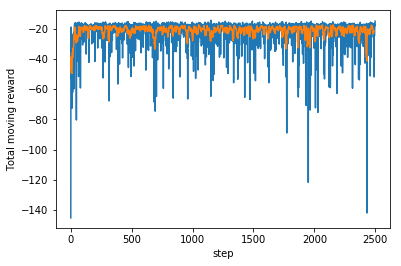

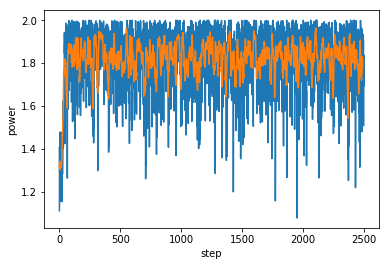

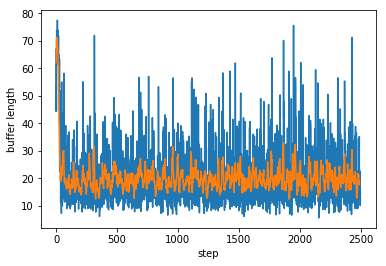

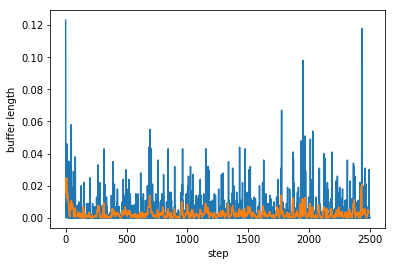

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])